Camilo Angarita 201111642\
Julian Velasquez 201014210\
Oscar Mauricio Cepeda 201123181\
Juan Camilo Marín 201412568

# Exercise 12

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [14]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [15]:
print(tweets.text)

tweet_id
570306133677760513                  @VirginAmerica What @dhepburn said.
570301130888122368    @VirginAmerica plus you've added commercials t...
570301083672813571    @VirginAmerica I didn't today... Must mean I n...
570301031407624196    @VirginAmerica it's really aggressive to blast...
570300817074462722    @VirginAmerica and it's a really big bad thing...
                                            ...                        
569587686496825344    @AmericanAir thank you we got on a different f...
569587371693355008    @AmericanAir leaving over 20 minutes Late Flig...
569587242672398336    @AmericanAir Please bring American Airlines to...
569587188687634433    @AmericanAir you have my money, you change my ...
569587140490866689    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object


In [16]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [17]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [18]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

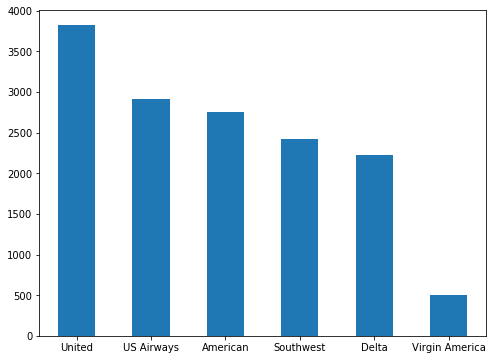

In [19]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

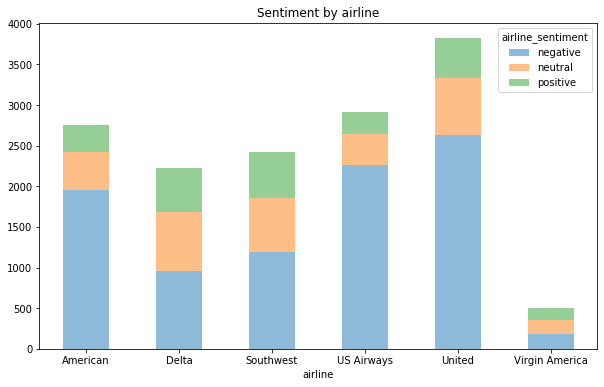

In [20]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")


# Exercise 12.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [22]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [23]:
vect = CountVectorizer(max_features = 1000)
X_dtm = vect.fit_transform(X)

In [33]:
rf = RandomForestClassifier()
pd.Series(cross_val_score(rf, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.725751
std       0.031961
min       0.664617
25%       0.708163
50%       0.725751
75%       0.746243
max       0.780738
dtype: float64

Como se puede observar la primer aproximación al modelo brinda un accuracy en cross  validation del 0.72 sin remover stopwords ni tampoco hacer gran modificaciones al countvectorizer. se prueban otros modelos de tokenización para mirar el desempeño del modelo

# Exercise 12.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [24]:
vect = CountVectorizer(stop_words='english', lowercase=True , max_features = 1000)
vect.fit(X)

CountVectorizer(max_features=1000, stop_words='english')

In [25]:
words = list(vect.vocabulary_.keys())
len(words)

1000

In [36]:
X_dtm = vect.fit_transform(X)



In [37]:
rf = RandomForestClassifier()
pd.Series(cross_val_score(rf, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.698497
std       0.044778
min       0.614754
25%       0.669399
50%       0.707309
75%       0.721653
max       0.775273
dtype: float64

Como se puede observar al incluir stop words el desempeño del modelo disminuye levemente, llegando a un accuracy del 0.69. este nivel aun no es competitivo y se intenta mejorar con mas modificaciones al countvectorizer

# Exercise 12.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [38]:
vect_stop = CountVectorizer(ngram_range=(1, 4), stop_words='english', lowercase=True , max_features = 1000)
vect_sinstop = CountVectorizer(ngram_range=(1, 4),lowercase=True , max_features = 1000)
X_dtmstop = vect_stop.fit_transform(X)
X_dtmsinstop = vect_sinstop.fit_transform(X)

In [39]:
pd.Series(cross_val_score(rf, X_dtmstop, y, cv=10)).describe()

count    10.000000
mean      0.695219
std       0.043227
min       0.607923
25%       0.669740
50%       0.704235
75%       0.721995
max       0.758880
dtype: float64

In [40]:
pd.Series(cross_val_score(rf, X_dtmsinstop, y, cv=10)).describe()

count    10.000000
mean      0.726298
std       0.034788
min       0.650956
25%       0.714652
50%       0.727801
75%       0.743511
max       0.781421
dtype: float64

Al incluir ngramas con o sin stopwords el desmepño se mantiene bastante similar, incluso el mejor modelo obtenido es el de ngramas sin stop words que  llega a superar el primer modelo en la medida de CV levemente al incluir los ngramas. 

# Exercise 12.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [41]:
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(X)

pd.Series(cross_val_score(rf, dtm, y, cv=10)).describe()

count    10.000000
mean      0.713866
std       0.038977
min       0.625000
25%       0.696892
50%       0.721311
75%       0.740266
max       0.764344
dtype: float64

Al utilizar estratgias de evaluación de importancia relativa el desmepeño del modelo se mantiene estable comparado con las demas estrategias con un acuracy en el CV  de 0.713